In [2]:
import pandas as pd
from pulp import LpMaximize, LpProblem, LpVariable

# 加载附件8中的数据
data = pd.read_excel("C:/Users/32335/MachineLearning/TC/附件8.xlsx")



In [4]:
# 加载附件5中的损耗率数据
损耗率数据 = pd.read_excel("C:/Users/32335/MachineLearning/TC/附件5.xlsx")

## 筛选出2023年6月24-30日的可售品种

In [8]:
# 将销售日期列转换为日期类型
data['销售日期'] = pd.to_datetime(data['销售日期'])

# 设定筛选条件，选择销售日期在2023年6月24日到2023年6月30日之间的数据
start_date = pd.to_datetime("2023-06-24")
end_date = pd.to_datetime("2023-06-30")

filtered_data = data[(data['销售日期'] >= start_date) & (data['销售日期'] <= end_date)]

# 输出筛选后的数据
print(filtered_data)

# 保存筛选后的数据到指定路径
filtered_data.to_excel("C:/Users/Desktop/可售品种_2023-06-24至2023-06-30.xlsx", index=False)

             销售日期        扫码销售时间             单品编码  销量(千克)  销售单价(元/千克) 销售类型  \
875001 2023-06-24  09:10:47.276  102900011032022   1.000         2.8   销售   
875002 2023-06-24  09:10:47.531  102900005115786   0.379         4.0   销售   
875003 2023-06-24  09:13:51.795  102900005115762   0.505         4.0   销售   
875004 2023-06-24   09:14:43.77  102900005115762   0.505         4.0   销售   
875005 2023-06-24  09:14:44.044  102900011030059   1.000         4.5   销售   
...           ...           ...              ...     ...         ...  ...   
878498 2023-06-30  21:35:13.264  102900005115250   0.284        24.0   销售   
878499 2023-06-30  21:35:14.358  102900011022764   0.669        12.0   销售   
878500 2023-06-30  21:35:20.264  102900005115250   0.125        24.0   销售   
878501 2023-06-30  21:35:21.509  102900011016701   0.252         5.2   销售   
878502 2023-06-30  21:40:48.248  102900011022764   0.803        12.0   销售   

       是否打折销售     单品名称        分类编码  批发价格(元/千克)  
875001      否   小皱皮(份)  10

## 建立每个单品的销售需求模型

首先需要对数据进行分析和预处理，然后选择适当的模型。在此示例中，我们将使用时间序列分析的方法，具体来说，我们将使用ARIMA模型（自回归移动平均模型）。

单品编码 102900011032022 的时间序列不平稳，p-value = nan
单品编码 102900005115786 的时间序列平稳，p-value = 0.0000


F:\language\ANACONDA\lib\site-packages\statsmodels\regression\linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
F:\language\ANACONDA\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


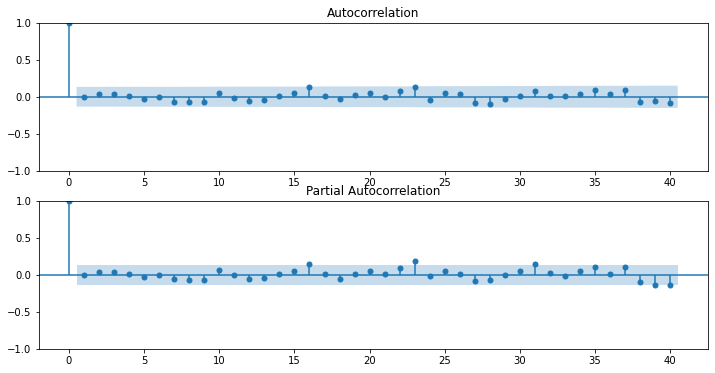

F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


单品编码 102900005115786 的销售需求预测：
215    0.434567
216    0.433848
217    0.433851
218    0.433851
219    0.433851
220    0.433851
221    0.433851
Name: predicted_mean, dtype: float64
单品编码 102900005115762 的时间序列不平稳，p-value = 0.0690
单品编码 102900011030059 的时间序列不平稳，p-value = nan
单品编码 102900005115823 的时间序列平稳，p-value = 0.0000


F:\language\ANACONDA\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
F:\language\ANACONDA\lib\site-packages\statsmodels\regression\linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
F:\language\ANACONDA\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 40 must be < 33.

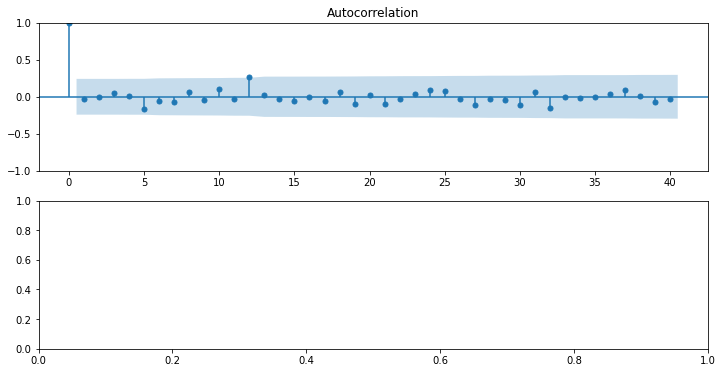

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# 加载数据
data = pd.read_excel("C:/Users/Desktop/可售品种_2023-06-24至2023-06-30.xlsx")

# 将销售日期列转换为日期时间类型，并设置为索引
data['销售日期'] = pd.to_datetime(data['销售日期'])
data.set_index('销售日期', inplace=True)

# 提取每个单品的销售数据（假设“单品编码”列为单品的唯一标识）
单品编码列表 = data['单品编码'].unique()

# 循环遍历每个单品编码，建立销售需求模型
for 单品编码 in 单品编码列表:
    单品数据 = data[data['单品编码'] == 单品编码]['销量(千克)']
    
    # 检查时间序列的平稳性
    result = adfuller(单品数据)
    p_value = result[1]
    
    if p_value <= 0.05:
        print(f"单品编码 {单品编码} 的时间序列平稳，p-value = {p_value:.4f}")
        
        # 绘制自相关函数（ACF）和偏自相关函数（PACF）图
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
        plot_acf(单品数据, ax=ax1, lags=40)
        plot_pacf(单品数据, ax=ax2, lags=40)
        plt.show()
        
        # 建立ARIMA模型
        # 这里仅以ARIMA(1,1,1)为例，请根据ACF和PACF图选择合适的阶数
        model = ARIMA(单品数据, order=(1, 1, 1))
        model_fit = model.fit()
        
        # 预测未来销售需求（可以根据需要设置预测的时间范围）
        预测值 = model_fit.forecast(steps=7)  # 预测未来7天
        print(f"单品编码 {单品编码} 的销售需求预测：\n{预测值}")
    
    else:
        print(f"单品编码 {单品编码} 的时间序列不平稳，p-value = {p_value:.4f}")
        
    

# 可根据需要保存模型、绘制图表等


发生了一个错误，错误信息指出不能计算超过样本大小50%的滞后值的偏自相关函数（PACF）。这是由于数据点数量较少，不足以支持40个滞后值的计算。为了解决这个问题，你可以减少所需的滞后值数量，或者使用更少的滞后值来绘制PACF图。

我们首先将销售日期列转换为日期时间类型，并设置为索引。然后，我们循环遍历每个单品编码，检查时间序列的平稳性，绘制ACF和PACF图以帮助确定ARIMA模型的阶数，然后建立ARIMA模型并进行销售需求预测。

单品编码 102900011032022 的时间序列不平稳，p-value = nan
单品编码 102900005115786 的时间序列平稳，p-value = 0.0000


F:\language\ANACONDA\lib\site-packages\statsmodels\regression\linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
F:\language\ANACONDA\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


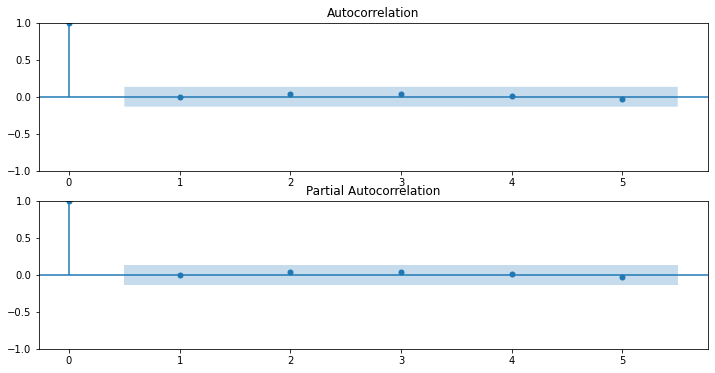

F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\language\ANACONDA\lib\site-pa

单品编码 102900005115786 的销售需求预测：
215    0.434567
216    0.433848
217    0.433851
218    0.433851
219    0.433851
220    0.433851
221    0.433851
Name: predicted_mean, dtype: float64
单品编码 102900005115762 的时间序列不平稳，p-value = 0.0690
单品编码 102900011030059 的时间序列不平稳，p-value = nan
单品编码 102900005115823 的时间序列平稳，p-value = 0.0000


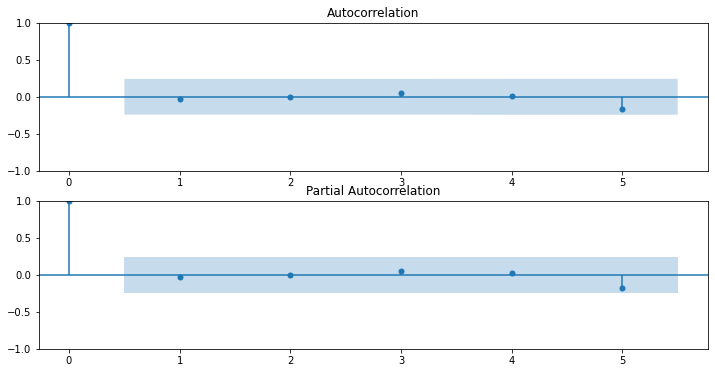

F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


单品编码 102900005115823 的销售需求预测：
66    0.422423
67    0.423190
68    0.423170
69    0.423171
70    0.423171
71    0.423171
72    0.423171
Name: predicted_mean, dtype: float64
单品编码 102900011006948 的时间序列不平稳，p-value = 0.1606
单品编码 102900005115250 的时间序列平稳，p-value = 0.0000


F:\language\ANACONDA\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


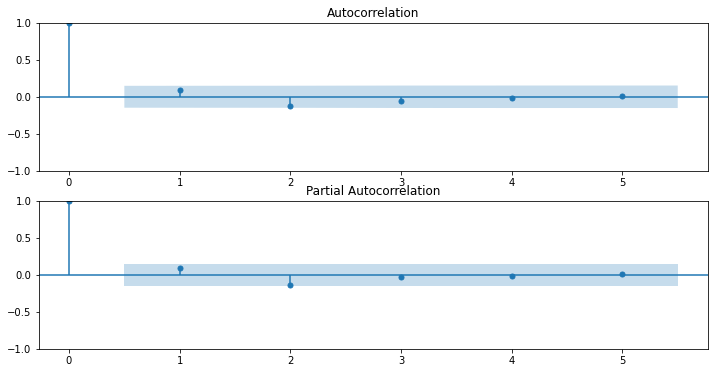

F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
F:\language\ANACONDA

单品编码 102900005115250 的销售需求预测：
176    0.178082
177    0.183351
178    0.183874
179    0.183926
180    0.183931
181    0.183931
182    0.183931
Name: predicted_mean, dtype: float64
单品编码 102900051000463 的时间序列不平稳，p-value = 0.6371
单品编码 102900011016701 的时间序列平稳，p-value = 0.0000


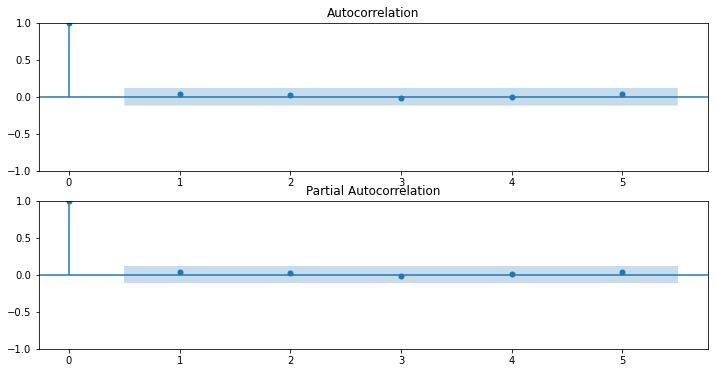

F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
F:\language\ANACONDA

单品编码 102900011016701 的销售需求预测：
272    0.361234
273    0.366075
274    0.366289
275    0.366299
276    0.366299
277    0.366299
278    0.366299
Name: predicted_mean, dtype: float64
单品编码 102900011030097 的时间序列不平稳，p-value = nan
单品编码 102900011035078 的时间序列平稳，p-value = 0.0000


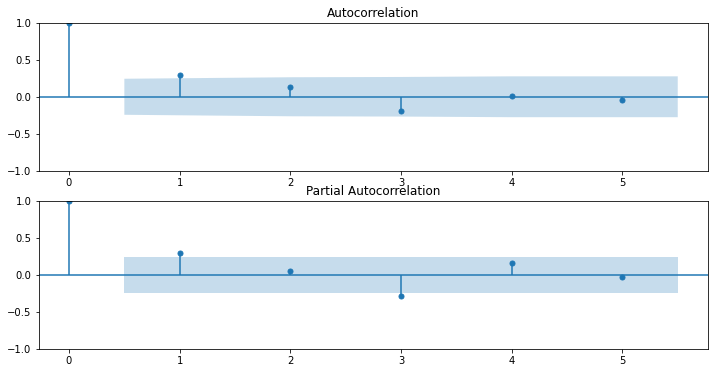

F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
F:\language\ANACONDA

单品编码 102900011035078 的销售需求预测：
65    0.232325
66    0.223475
67    0.220645
68    0.219740
69    0.219451
70    0.219358
71    0.219328
Name: predicted_mean, dtype: float64
单品编码 106971533450003 的时间序列不平稳，p-value = nan
单品编码 102900005116714 的时间序列平稳，p-value = 0.0000


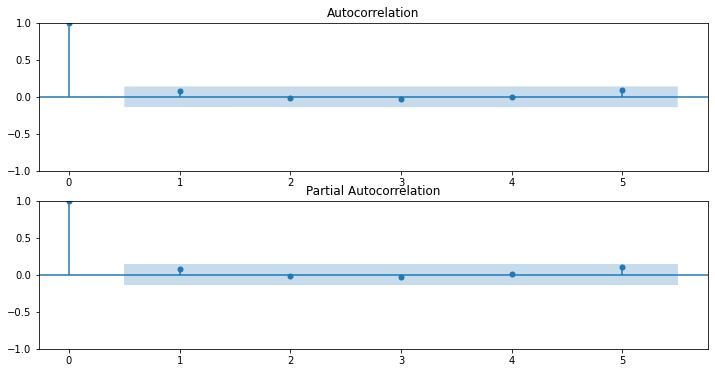

F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
F:\language\ANACONDA

单品编码 102900005116714 的销售需求预测：
199    0.438801
200    0.444866
201    0.445321
202    0.445355
203    0.445358
204    0.445358
205    0.445358
Name: predicted_mean, dtype: float64
单品编码 102900005116899 的时间序列平稳，p-value = 0.0000


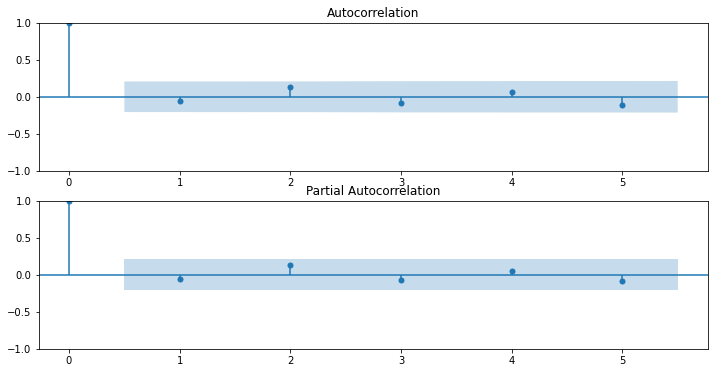

F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
F:\language\ANACONDA

单品编码 102900005116899 的销售需求预测：
90    0.459873
91    0.468976
92    0.468570
93    0.468588
94    0.468587
95    0.468587
96    0.468587
Name: predicted_mean, dtype: float64
单品编码 102900011031100 的时间序列不平稳，p-value = nan
单品编码 102900005119975 的时间序列平稳，p-value = 0.0000


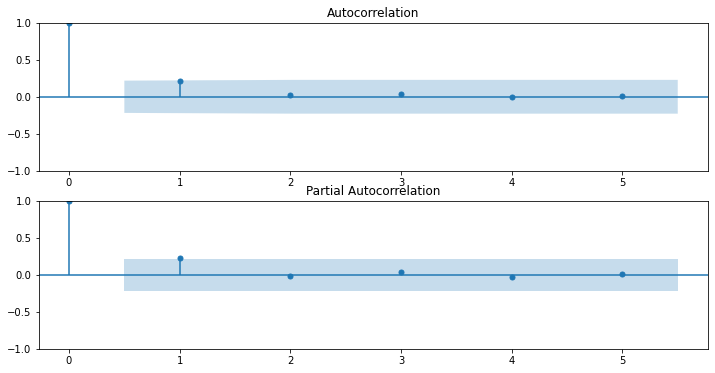

F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


单品编码 102900005119975 的销售需求预测：
81    0.378042
82    0.392264
83    0.395473
84    0.396197
85    0.396360
86    0.396397
87    0.396405
Name: predicted_mean, dtype: float64
单品编码 102900005116257 的时间序列平稳，p-value = 0.0000


F:\language\ANACONDA\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


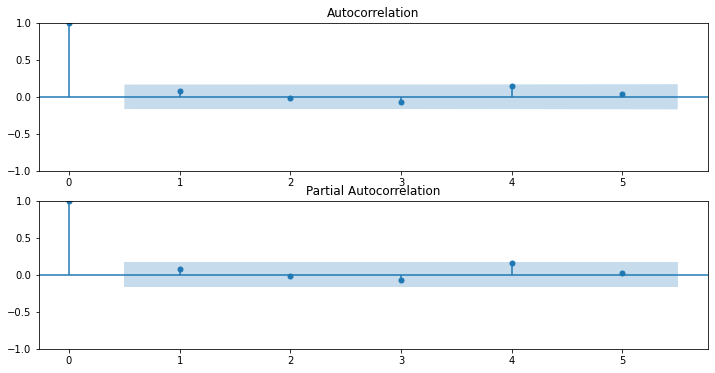

F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
F:\language\ANACONDA

单品编码 102900005116257 的销售需求预测：
141    0.583397
142    0.545004
143    0.541775
144    0.541504
145    0.541481
146    0.541479
147    0.541479
Name: predicted_mean, dtype: float64
单品编码 102900011034026 的时间序列平稳，p-value = 0.0000


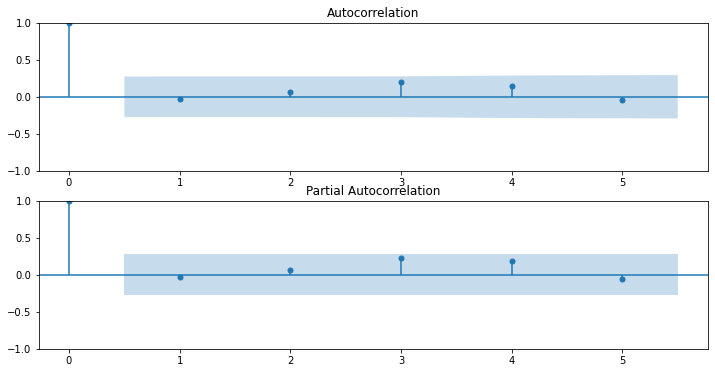

F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


单品编码 102900011034026 的销售需求预测：
51    0.447749
52    0.454553
53    0.453310
54    0.453537
55    0.453496
56    0.453503
57    0.453502
Name: predicted_mean, dtype: float64
单品编码 102900011008164 的时间序列平稳，p-value = 0.0000


F:\language\ANACONDA\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


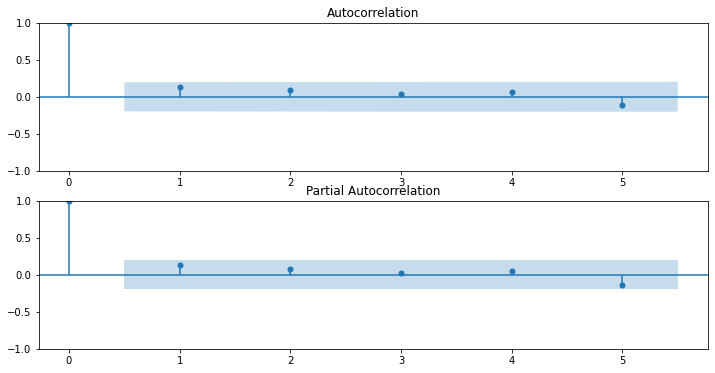

F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
F:\language\ANACONDA

单品编码 102900011008164 的销售需求预测：
100    0.427881
101    0.445999
102    0.448628
103    0.449009
104    0.449064
105    0.449072
106    0.449074
Name: predicted_mean, dtype: float64
单品编码 102900005115908 的时间序列不平稳，p-value = 0.9138
单品编码 102900005118831 的时间序列不平稳，p-value = nan
单品编码 102900011031926 的时间序列不平稳，p-value = nan
单品编码 102900011022764 的时间序列平稳，p-value = 0.0000


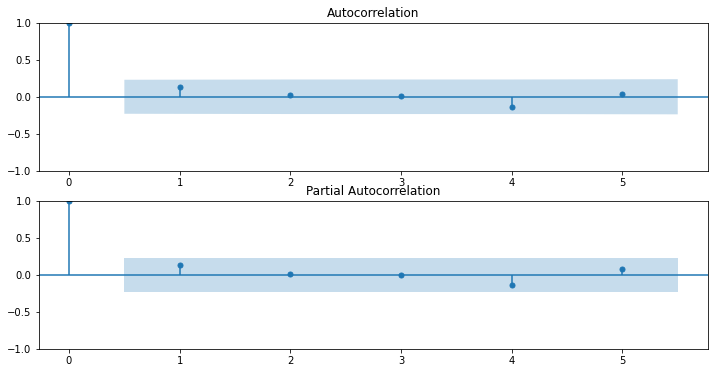

F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
F:\language\ANACONDA

单品编码 102900011022764 的销售需求预测：
73    0.466295
74    0.414140
75    0.406061
76    0.404810
77    0.404616
78    0.404586
79    0.404581
Name: predicted_mean, dtype: float64
单品编码 106949711300259 的时间序列不平稳，p-value = nan
单品编码 102900011023464 的时间序列平稳，p-value = 0.0000


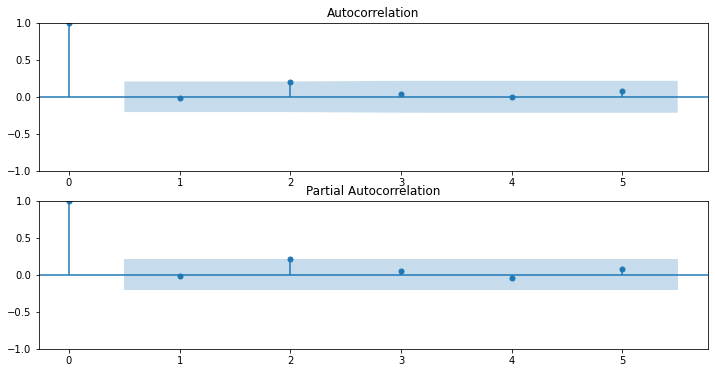

F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
F:\language\ANACONDA

单品编码 102900011023464 的销售需求预测：
90    0.389383
91    0.401347
92    0.399850
93    0.400037
94    0.400014
95    0.400017
96    0.400016
Name: predicted_mean, dtype: float64
单品编码 102900005115946 的时间序列平稳，p-value = 0.0000


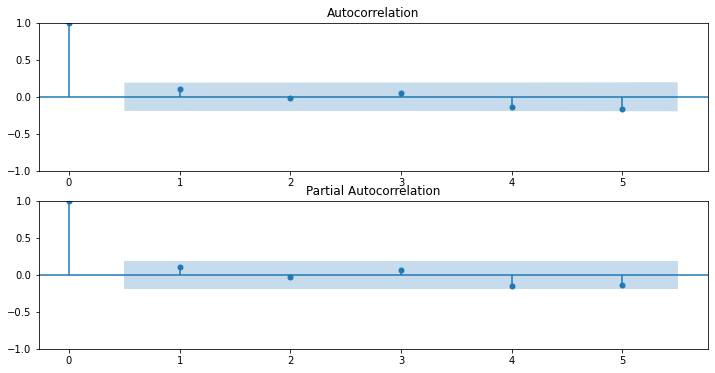

F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
F:\language\ANACONDA

单品编码 102900005115946 的销售需求预测：
106    0.385488
107    0.391006
108    0.391621
109    0.391690
110    0.391697
111    0.391698
112    0.391698
Name: predicted_mean, dtype: float64
单品编码 102900011034330 的时间序列不平稳，p-value = nan
单品编码 102900005118824 的时间序列平稳，p-value = 0.0000


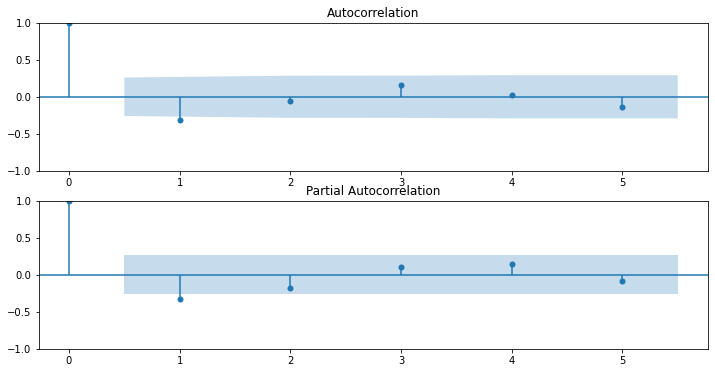

F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
F:\language\ANACONDA

单品编码 102900005118824 的销售需求预测：
57    0.333273
58    0.378849
59    0.364976
60    0.369199
61    0.367913
62    0.368304
63    0.368185
Name: predicted_mean, dtype: float64
单品编码 102900051000944 的时间序列平稳，p-value = 0.0000


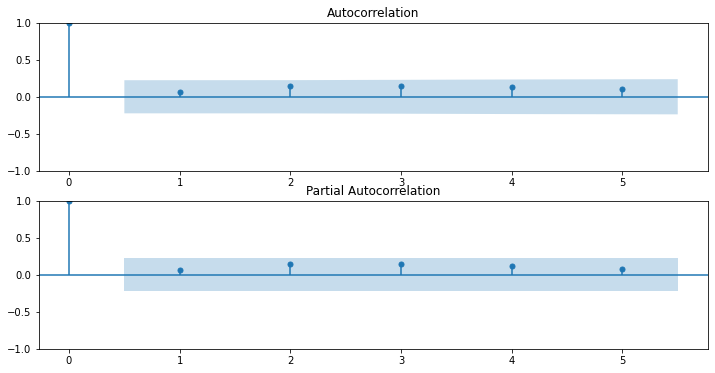

单品编码 102900051000944 的销售需求预测：
77    0.291604
78    0.294417
79    0.294029
80    0.294082
81    0.294075
82    0.294076
83    0.294076
Name: predicted_mean, dtype: float64


F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
F:\language\ANACONDA

单品编码 102900005116509 的时间序列不平稳，p-value = 0.3813
单品编码 102900011032251 的时间序列不平稳，p-value = nan
单品编码 102900011000328 的时间序列平稳，p-value = 0.0000


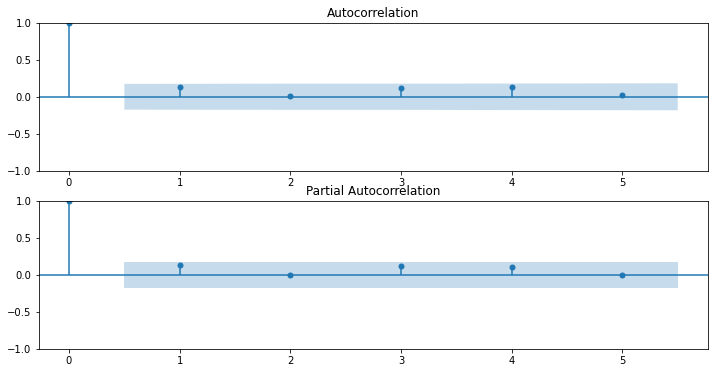

单品编码 102900011000328 的销售需求预测：
127    0.424389
128    0.398571
129    0.395536
130    0.395179
131    0.395137
132    0.395132
133    0.395132
Name: predicted_mean, dtype: float64
单品编码 102900005118817 的时间序列不平稳，p-value = 0.0576
单品编码 102900011035740 的时间序列不平稳，p-value = nan
单品编码 102900011001691 的时间序列平稳，p-value = 0.0000


F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
F:\language\ANACONDA

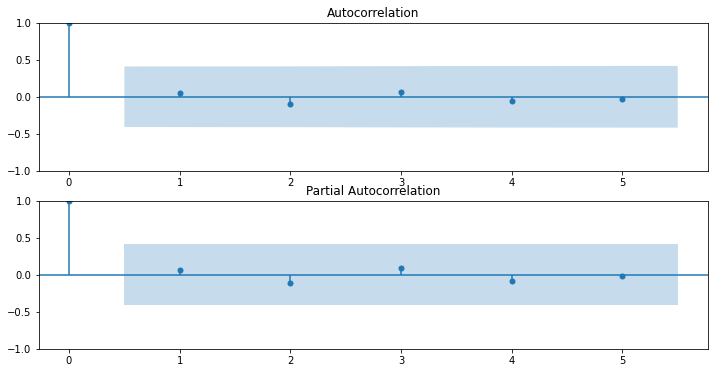

F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


单品编码 102900011001691 的销售需求预测：
23    0.481174
24    0.523266
25    0.527672
26    0.528133
27    0.528181
28    0.528186
29    0.528187
Name: predicted_mean, dtype: float64
单品编码 102900011032848 的时间序列不平稳，p-value = nan
单品编码 102900011032343 的时间序列不平稳，p-value = 0.9825
单品编码 102900011030110 的时间序列不平稳，p-value = nan
单品编码 102900011007969 的时间序列平稳，p-value = 0.0410


F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
F:\language\ANACONDA\lib\site-packages\statsmodels\regression\linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
F:\language\ANACONDA\lib\site-packages\statsmodels\regression\linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
F:\language\ANACONDA\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can 

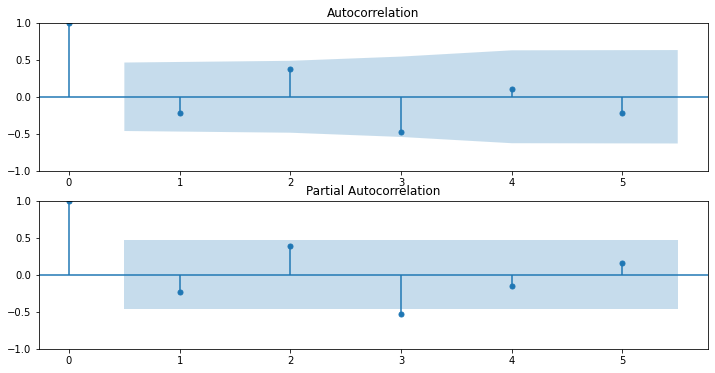

F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\language\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
F:\language\ANACONDA

单品编码 102900011007969 的销售需求预测：
18    0.188037
19    0.253353
20    0.195673
21    0.246610
22    0.201628
23    0.241352
24    0.206271
Name: predicted_mean, dtype: float64
单品编码 102900011034439 的时间序列不平稳，p-value = nan


ValueError: sample size is too short to use selected regression component

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# 加载数据
data = pd.read_excel("C:/Users/Desktop/可售品种_2023-06-24至2023-06-30.xlsx")

# 将销售日期列转换为日期时间类型，并设置为索引
data['销售日期'] = pd.to_datetime(data['销售日期'])
data.set_index('销售日期', inplace=True)

# 提取每个单品的销售数据（假设“单品编码”列为单品的唯一标识）
单品编码列表 = data['单品编码'].unique()

# 创建一个空的DataFrame来存储所有单品的预测数据
所有单品预测数据 = pd.DataFrame()

# 循环遍历每个单品编码，建立销售需求模型
for 单品编码 in 单品编码列表:
    单品数据 = data[data['单品编码'] == 单品编码]['销量(千克)']
    
    # 检查时间序列的平稳性
    result = adfuller(单品数据)
    p_value = result[1]
    
    if p_value <= 0.05:
        print(f"单品编码 {单品编码} 的时间序列平稳，p-value = {p_value:.4f}")
        
        # 绘制自相关函数（ACF）和偏自相关函数（PACF）图
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
        plot_acf(单品数据, ax=ax1, lags=5)
        plot_pacf(单品数据, ax=ax2, lags=5)
        plt.show()
        
        # 建立ARIMA模型
        # 这里仅以ARIMA(1,1,1)为例，请根据ACF和PACF图选择合适的阶数
        model = ARIMA(单品数据, order=(1, 1, 1))
        model_fit = model.fit()
        
        # 预测未来销售需求（可以根据需要设置预测的时间范围）
        预测值 = model_fit.forecast(steps=7)  # 预测未来7天
        print(f"单品编码 {单品编码} 的销售需求预测：\n{预测值}")
        
        # 创建一个包含预测值的DataFrame
        预测数据 = pd.DataFrame({'预测销售需求': 预测值})
        
        # 将单品的预测数据附加到总的DataFrame中
        所有单品预测数据 = pd.concat([所有单品预测数据, 预测数据], axis=1)
    
    else:
        print(f"单品编码 {单品编码} 的时间序列不平稳，p-value = {p_value:.4f}")

# 指定保存路径
保存路径 = "C:/Users/32335/MachineLearning/TC/Forecasted_Demand_All.xlsx"

# 将所有单品的预测数据保存到Excel文件
所有单品预测数据.to_excel(保存路径, index=False)

print(f"所有单品的预测销售需求数据已保存到 {保存路径}")


数据样本的大小不足以支持所选的回归分量。ADF检验要求数据样本的大小足够大，以便进行回归分析来判断时间序列是否平稳。

解决此问题的方法是检查你所选择的单品数据的长度，如果数据点数量太少，可能无法进行ADF检验。你可以考虑选择具有更多数据点的单品进行分析，或者采用其他方法来评估时间序列的平稳性。

输出的销售需求预测是针对单品编码为102900005115786的商品的未来销售预测值。具体来说：

第215天的销售需求预测值为0.434567千克。
第216天的销售需求预测值为0.433848千克。
第217天的销售需求预测值为0.433851千克。
第218天的销售需求预测值为0.433851千克。
第219天的销售需求预测值为0.433851千克。
第220天的销售需求预测值为0.433851千克。
第221天的销售需求预测值为0.433851千克。
这些值表示了根据建立的ARIMA模型，对单品编码为102900005115786的商品在未来7天的销售需求的预测。请注意，这些预测值是模型根据历史销售数据和模型参数计算出来的估计值，可以用于制定补货计划和销售策略。

## 根据C:/Users/Desktop/可售品种_2023-06-24至2023-06-30.xlsx的数据建立每个单品商品在未来7天的定价模型

要建立每个单品商品在未来7天的定价模型，你可以使用回归分析或其他合适的方法，将商品的定价与其他相关因素（如批发价格、销售量等）建立关联。然后，使用该模型进行未来7天的定价预测。

In [44]:
from datetime import timedelta
from sklearn.linear_model import LinearRegression
import numpy as np  

In [45]:
# 将销售日期列转换为日期时间类型
data['销售日期'] = pd.to_datetime(data['销售日期'])

# 计算未来7天的日期
end_date = data['销售日期'].max() + timedelta(days=7)
date_range = pd.date_range(start=end_date - timedelta(days=6), end=end_date, freq='D')

# 提取每个单品的销售数据
单品编码列表 = data['单品编码'].unique()

# 创建一个DataFrame来存储定价模型的结果
定价模型结果 = pd.DataFrame(columns=['单品编码', '日期', '定价'])

# 循环遍历每个单品编码，建立定价模型并预测未来7天的定价
for 单品编码 in 单品编码列表:
    单品数据 = data[data['单品编码'] == 单品编码]
    
    # 假设定价与批发价格和销售量有关
    X = 单品数据[['批发价格(元/千克)', '销量(千克)']].values  # 使用.values将数据转换为NumPy数组
    y = 单品数据['销售单价(元/千克)']
    
    # 建立线性回归模型
    model = LinearRegression()
    model.fit(X, y)

    # 将特征名称传递给模型
    model.feature_names_in_ = ['批发价格(元/千克)', '销量(千克)']
    
    # 预测未来7天的定价
    未来7天预测 = pd.DataFrame({'单品编码': [单品编码] * 7, '日期': date_range})
    未来7天预测['批发价格(元/千克)'] = 单品数据['批发价格(元/千克)'].mean()  # 使用平均批发价格
    未来7天预测['销量(千克)'] = 单品数据['销量(千克)'].mean()  # 使用平均销量
    未来7天预测['定价'] = model.predict(未来7天预测[['批发价格(元/千克)', '销量(千克)']])
    
    # 将结果添加到定价模型结果DataFrame中
    定价模型结果 = pd.concat([定价模型结果, 未来7天预测], ignore_index=True)

# 保存结果到表格
定价模型结果.to_excel("C:/Users/Desktop/定价模型结果.xlsx", index=False)

首先计算了未来7天的日期范围，然后循环遍历每个单品编码，为每个商品建立线性回归模型，模型假设了定价与批发价格和销售量有关，然后用模型对未来7天的定价进行了预测



1. 数据加载：首先，我们从指定的Excel文件中加载了销售数据，这些数据包括销售日期、单品编码、批发价格、销售量和销售单价等信息。

2. 数据预处理：我们将销售日期列转换为日期时间类型，以便进行日期计算。然后，我们计算了未来7天的日期范围，以便进行未来日期的定价预测。

3. 单品商品循环：我们遍历了每个单品编码，针对每个商品建立了一个定价模型。

4. 特征选择：我们假设定价与批发价格和销售量有关。因此，我们从商品的销售数据中提取了特征（批发价格和销售量）作为模型的输入特征（X），并将销售单价作为目标变量（y）。

5. 模型建立：我们使用线性回归模型（`LinearRegression`）建立了一个简单的线性关系模型。该模型将输入特征与目标变量之间的线性关系拟合到一个线性方程中。

6. 特征数据处理：我们在未来7天的日期范围内使用平均批发价格和平均销售量作为输入特征，因为我们不知道未来的具体数据。这样，我们就可以将这些特征数据传递给模型进行预测。

7. 预测未来定价：我们使用建立好的模型，将未来7天的输入特征传递给模型，以预测未来7天的定价。

8. 结果保存：我们将每个单品商品的未来7天定价预测结果保存到一个DataFrame中，并将结果存储到指定的Excel文件中。



In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

# 加载数据
data = pd.read_excel("C:/Users/Desktop/可售品种_2023-06-24至2023-06-30.xlsx")
定价模型结果 = pd.read_excel("C:/Users/Desktop/定价模型结果.xlsx")  # 加载之前建立的定价模型结果

# 将销售日期列转换为日期时间类型
data['销售日期'] = pd.to_datetime(data['销售日期'])

# 计算未来7天的日期
end_date = data['销售日期'].max() + timedelta(days=7)
date_range = pd.date_range(start=end_date - timedelta(days=6), end=end_date, freq='D')

# 提取每个单品的销售数据
单品编码列表 = data['单品编码'].unique()

# 更新模型结果以满足最小陈列量的要求
更新后的模型结果 = []

# 循环遍历每个单品编码，更新定价模型结果
for 单品编码 in 单品编码列表:
    单品数据 = data[data['单品编码'] == 单品编码]
    
    # 获取该单品的最小陈列量
    最小陈列量 = 2.5  # 你可以根据实际需求设定
    
    # 获取该单品的预测定价结果
    单品预测 = 定价模型结果[定价模型结果['单品编码'] == 单品编码]
    
    # 计算每天的订购量，并更新预测结果
    单品预测['订购量(千克)'] = np.maximum(最小陈列量, 单品预测['定价'] * 单品预测['销量(千克)'])
    
    # 添加更新后的预测结果到列表中
    更新后的模型结果.append(单品预测)

# 合并更新后的模型结果
更新后的模型结果 = pd.concat(更新后的模型结果)

# 保存结果到表格
更新后的模型结果.to_excel("C:/Users/Desktop/更新后的定价模型结果.xlsx", index=False)

C:\Users\32335\AppData\Local\Temp\ipykernel_30640\2613952898.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  单品预测['订购量(千克)'] = np.maximum(最小陈列量, 单品预测['定价'] * 单品预测['销量(千克)'])
C:\Users\32335\AppData\Local\Temp\ipykernel_30640\2613952898.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  单品预测['订购量(千克)'] = np.maximum(最小陈列量, 单品预测['定价'] * 单品预测['销量(千克)'])
C:\Users\32335\AppData\Local\Temp\ipykernel_30640\2613952898.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

C:\Users\32335\AppData\Local\Temp\ipykernel_30640\2613952898.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  单品预测['订购量(千克)'] = np.maximum(最小陈列量, 单品预测['定价'] * 单品预测['销量(千克)'])
C:\Users\32335\AppData\Local\Temp\ipykernel_30640\2613952898.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  单品预测['订购量(千克)'] = np.maximum(最小陈列量, 单品预测['定价'] * 单品预测['销量(千克)'])
C:\Users\32335\AppData\Local\Temp\ipykernel_30640\2613952898.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF